In [44]:
import pandas as pd
import numpy as np
from sklearn import impute
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [45]:
# Dataset: https://drive.google.com/drive/folders/1QP5duX77lr2Q5UtgH9oCD6MkFIe6ImsS
df = pd.read_csv("X_train.csv",
                 header=0,index_col=False,delimiter=',').iloc[:, :-1]
df_answers=pd.read_csv("y_train.csv",
                 header=0,index_col=False,delimiter=',')
df = df.drop(df.columns[0], axis=1)
df_answers=df_answers.drop(df_answers.columns[0],axis=1)
headers=df.columns
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,71043.313249,6.046182,6.095862,3.34,20763.604137
1,65632.925982,6.420381,5.929531,4.43,42803.221409
2,74960.767664,6.467532,6.483896,3.27,35918.893782
3,71309.250170,7.513611,8.409303,4.35,32356.997377
4,68898.345913,6.787649,7.871353,6.39,39515.571562
...,...,...,...,...,...
3495,67136.075499,6.218487,8.408889,5.17,31846.253359
3496,48144.053206,5.440212,8.419112,4.48,23465.382981
3497,78951.735897,5.443039,5.759583,2.18,31055.051090
3498,80040.173315,6.449555,8.453262,5.50,29699.011639


In [46]:
import itertools
# here I will find all possible combinations of numerical features
features=df.columns.tolist()
all_combinations = []
for r in range(1,len(features) + 1):
    subsets = list(itertools.combinations(features, r))
    all_combinations.extend(subsets)
all_combinations

[('Avg. Area Income',),
 ('Avg. Area House Age',),
 ('Avg. Area Number of Rooms',),
 ('Avg. Area Number of Bedrooms',),
 ('Area Population',),
 ('Avg. Area Income', 'Avg. Area House Age'),
 ('Avg. Area Income', 'Avg. Area Number of Rooms'),
 ('Avg. Area Income', 'Avg. Area Number of Bedrooms'),
 ('Avg. Area Income', 'Area Population'),
 ('Avg. Area House Age', 'Avg. Area Number of Rooms'),
 ('Avg. Area House Age', 'Avg. Area Number of Bedrooms'),
 ('Avg. Area House Age', 'Area Population'),
 ('Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms'),
 ('Avg. Area Number of Rooms', 'Area Population'),
 ('Avg. Area Number of Bedrooms', 'Area Population'),
 ('Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms'),
 ('Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Bedrooms'),
 ('Avg. Area Income', 'Avg. Area House Age', 'Area Population'),
 ('Avg. Area Income',
  'Avg. Area Number of Rooms',
  'Avg. Area Number of Bedrooms'),
 ('Avg. Area Income', 'Avg. A

In [47]:
df=pd.concat([df,df_answers],axis=1)

In [48]:
df = df.loc[df['Avg. Area Income'] > 20000]
df = df.loc[df['Avg. Area Income'] < 100000]
df = df.loc[df['Avg. Area House Age'] < 9]
df = df.loc[df['Avg. Area House Age'] > 3]
df = df.loc[df['Avg. Area Number of Rooms'] > 4]
df = df.loc[df['Avg. Area Number of Rooms'] < 10]

In [49]:
def scale_data(data_):
    scaler = MinMaxScaler()
    popa = scaler.fit_transform(data_)
    return popa

In [51]:
po=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']
df[po]=scale_data(df[po])

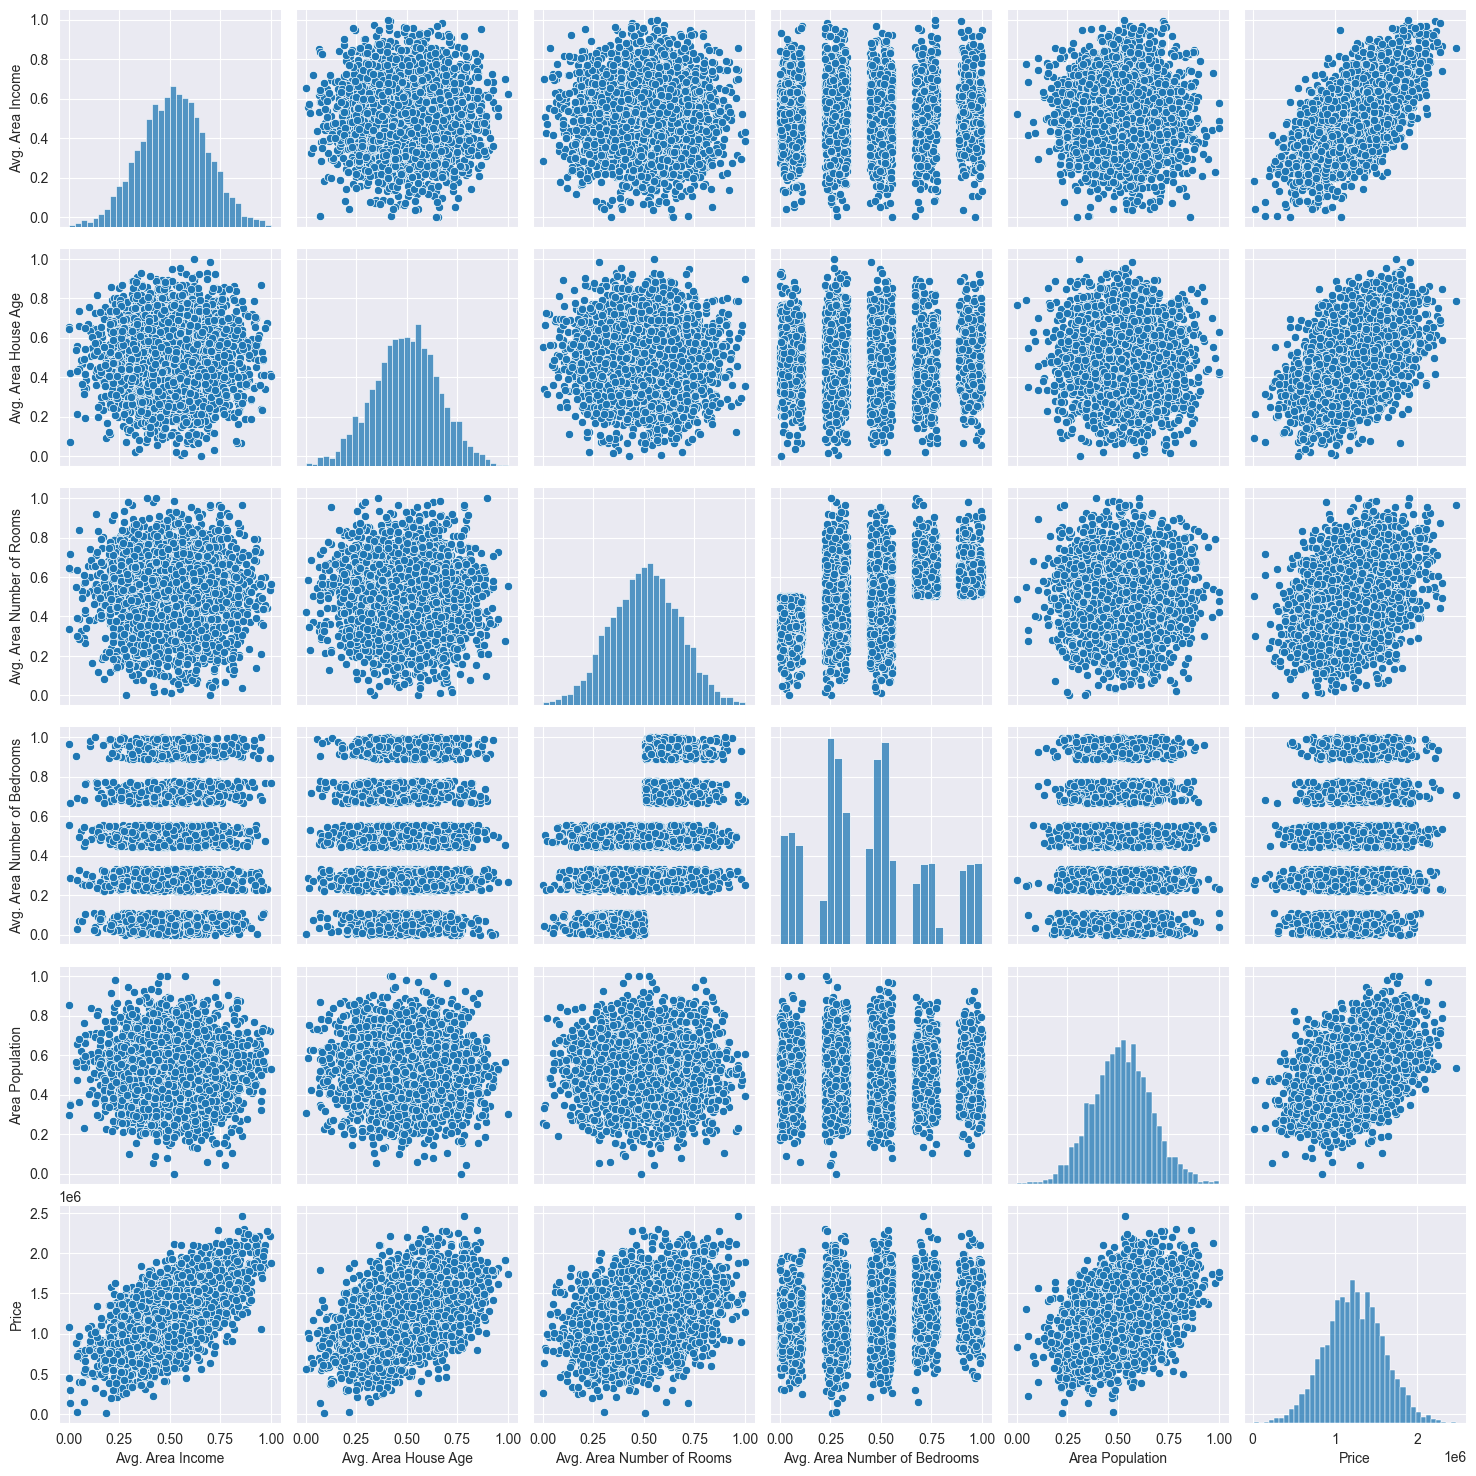

In [52]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [53]:
X=df.copy()
y=df['Price'].copy()
X_train, X_test, y_ans_train, y_ans_test = train_test_split(X, y, train_size=0.7,random_state=1)

In [54]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
std = MinMaxScaler()
X_train[X_train.columns]= std.fit_transform(X_train[X_train.columns])
X_test[X_train.columns] = std.fit_transform(X_test[X_train.columns])

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
dict_of_combinations={}
for column_combinations in all_combinations:
    print(f'Current feature combination: {" and ".join(column_combinations)}')
    # create a new dataset with current columns
    X=X_train[[i for i in column_combinations]]
    y=y_ans_train
    lr = LinearRegression()
    lr.fit(X, y)
    y_predicted = lr.predict(X_test[[i for i in column_combinations]])
    MSE_sklearn = mean_absolute_error(y_ans_test, y_predicted)
    analytical_weights=lr.coef_
    MAE=mean_absolute_error(y_ans_test, y_predicted)
    print(f'weights : {analytical_weights}')
    print(f'MAE: {MAE}')
    dict_of_combinations[" and ".join(column_combinations)]=MAE
    print()
dict_of_combinations=sorted(dict_of_combinations.items(),key=lambda x:x[1])
dict_of_combinations[:2]

Current feature combination: Avg. Area Income
weights : [1359999.28505494]
MAE: 214376.85758055252

Current feature combination: Avg. Area House Age
weights : [958784.24573846]
MAE: 250473.10954569126

Current feature combination: Avg. Area Number of Rooms
weights : [685258.27349492]
MAE: 264373.52254767943

Current feature combination: Avg. Area Number of Bedrooms
weights : [218880.16118255]
MAE: 276292.20533319836

Current feature combination: Area Population
weights : [1015755.30532739]
MAE: 252866.23702143936

Current feature combination: Avg. Area Income and Avg. Area House Age
weights : [1351872.42426374  946879.15015866]
MAE: 172163.52201319026

Current feature combination: Avg. Area Income and Avg. Area Number of Rooms
weights : [1370423.84897877  704692.48584004]
MAE: 193050.6301139495

Current feature combination: Avg. Area Income and Avg. Area Number of Bedrooms
weights : [1353200.57531115  201985.0970577 ]
MAE: 208656.3679008191

Current feature combination: Avg. Area Incom

[('Avg. Area Income and Avg. Area House Age and Avg. Area Number of Rooms and Area Population',
  89189.6899722887),
 ('Avg. Area Income and Avg. Area House Age and Avg. Area Number of Rooms and Avg. Area Number of Bedrooms and Area Population',
  89257.10815698991)]

In [59]:
testing_df=pd.read_csv('X_test.csv')[[i for i in dict_of_combinations[0][0].split(' and ')]]
testing_df[testing_df.columns]=std.fit_transform(testing_df[testing_df.columns])
testing_df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,0.486485,0.415229,0.343952,0.529907
1,0.329828,0.375520,0.085394,0.685395
2,0.619938,0.387912,0.168350,0.476591
3,0.610565,0.520781,0.690029,0.397354
4,0.701661,0.352685,0.373702,0.458877
...,...,...,...,...
1495,0.413802,0.554466,0.486996,0.298779
1496,0.617682,0.887926,0.500454,0.404076
1497,0.417658,0.361447,0.906830,0.580715
1498,0.428631,0.449234,0.572722,0.640892


In [57]:
X=X_train[[i for i in dict_of_combinations[0][0].split(' and ')]]
y=y_ans_train
lr = LinearRegression()
lr.fit(X, y)
y_predicted = lr.predict(X_test[[i for i in dict_of_combinations[0][0].split(' and ')]])
MSE_sklearn = mean_absolute_error(y_ans_test, y_predicted)
analytical_weights=lr.coef_
MAE=mean_absolute_error(y_ans_test, y_predicted)
y_exc_pred=lr.predict(testing_df)
ans=[[i[0],float(i[1])] for i in enumerate(y_exc_pred)]

In [58]:
import csv

# file='y_test.csv'
with open('y_test.csv','w') as file:
    file.write('ID,Predicted\n')
    writer = csv.writer(file)
    writer.writerows(ans)